In [20]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

In [17]:
pip install wordcloud

     |████████████████████████████████| 366 kB 23.0 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install textblob

     |████████████████████████████████| 636 kB 24.2 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [7]:
from urllib.request import urlopen 
json = urlopen("http://52.91.80.124:8080/quotes").read()
df = pd.read_json(html)

In [30]:
df

,author,quote_desc,quote_id,quote_type
0,Nelson Mandela,It always seem impossible until it is done.,1,Motivation
1,Eleanor Roosevelt,With the new day comes new strength and new th...,2,Motivation
2,Mark Twain,The secret of getting ahead is getting started.,3,Motivation
3,Theodore Roosevelt,With self-discipline most anything is possible.,4,Inspiration
4,Aristotle,It is during our darkest moments that we must ...,5,Inspiration
5,Homero Simpson,D'oh!,6,Motivation


In [12]:
df.shape

(6, 4)

In [13]:
df.columns

Index(['author', 'quote_desc', 'quote_id', 'quote_type'], dtype='object')

In [24]:
columns = ['author','quote_desc','quote_id','quote_type']
 
da = pd.DataFrame(df.drop(columns,axis=1,inplace=False))

In [25]:
da

""
0
1
2
3
4
5


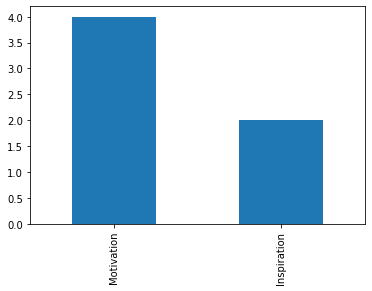

In [28]:
df['quote_type'].value_counts().plot(kind='bar')

In [29]:
df['quote_desc'] = df['quote_desc'].astype(str)

In [31]:
df['quote_desc'][2]

'The secret of getting ahead is getting started.'

In [32]:
df['quote_desc'] = df['quote_desc'].apply(lambda x: " ".join(x.lower() for x in x.split()))


In [33]:
df['quote_desc'][2]

'the secret of getting ahead is getting started.'

In [34]:
df['quote_desc'] = df['quote_desc'].str.replace('[^\w\s]','')

In [35]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [36]:
stop = stopwords.words('english')

In [37]:
df['quote_desc'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


0                always seem impossible done
1    new day comes new strength new thoughts
2       secret getting ahead getting started
3           selfdiscipline anything possible
4       darkest moments must focus see light
5                                        doh
Name: quote_desc, dtype: object

In [38]:
df['quote_desc'][2]

'the secret of getting ahead is getting started'

In [39]:
st = PorterStemmer()

In [40]:
df['quote_desc'] = df['quote_desc'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))


In [41]:
df['quote_desc'][2]

'the secret of get ahead is get start'

In [42]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

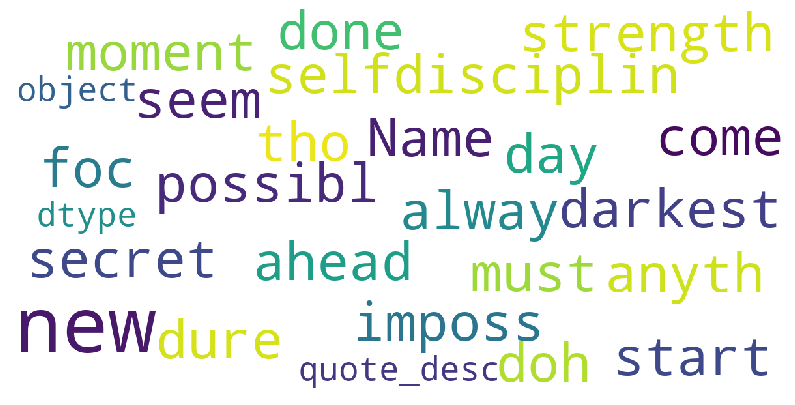

In [43]:
def show_wordcloud(col, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=500,
        max_font_size=40, 
        scale=3,
        random_state=1
    ).generate(str(col))

    fig = plt.figure(1, figsize=(14, 14))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()


if __name__ == '__main__':

    show_wordcloud(df['quote_desc']) 

In [44]:
def senti(x):
    return TextBlob(x).sentiment  
 
df['words'] = df['quote_desc'].apply(senti)

In [45]:
df

,author,quote_desc,quote_id,quote_type,words
0,Nelson Mandela,it alway seem imposs until it is done,1,Motivation,"(0.0, 0.0)"
1,Eleanor Roosevelt,with the new day come new strength and new tho...,2,Motivation,"(0.13636363636363635, 0.45454545454545453)"
2,Mark Twain,the secret of get ahead is get start,3,Motivation,"(-0.4, 0.7)"
3,Theodore Roosevelt,with selfdisciplin most anyth is possibl,4,Inspiration,"(0.5, 0.5)"
4,Aristotle,it is dure our darkest moment that we must foc...,5,Inspiration,"(0.4, 0.7)"
5,Homero Simpson,doh,6,Motivation,"(0.0, 0.0)"


In [47]:
df.words.head()

0                                    (0.0, 0.0)
1    (0.13636363636363635, 0.45454545454545453)
2                                   (-0.4, 0.7)
3                                    (0.5, 0.5)
4                                    (0.4, 0.7)
Name: words, dtype: object